# Task 4.10: Coding Etiquette & Excel Reporting


## Step 1- Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#set path
path = r'C:\Users\RUZANNA\OneDrive\Desktop\Careerfoundry\Python\Instacart Basket Anlysis-05.2023'

In [3]:
data = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'ords_prods_custom_merge.pkl'))

In [5]:
department_name = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'department_name.pkl'))

In [6]:
data.shape

(30328763, 30)

In [7]:
data.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'busiest_day', 'price_range_loc', 'Busiest days',
       'Slowest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_order', 'Frequency_flag',
       'Gender', 'state', 'age', 'date_of_joined', 'number_of_dependents',
       'family_status', 'income'],
      dtype='object')

<Axes: title={'center': 'Busiest Period of Day'}>

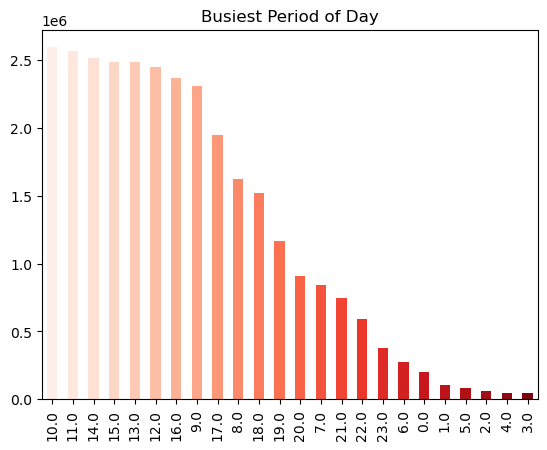

In [8]:
# illustrate the busiest period of a day, this is for excel report
data['order_hour_of_day'].value_counts(dropna=False).plot(kind='bar',  title = 'Busiest Period of Day', color = sns.color_palette('Reds', 24))

<Axes: title={'center': 'The most popular departments'}>

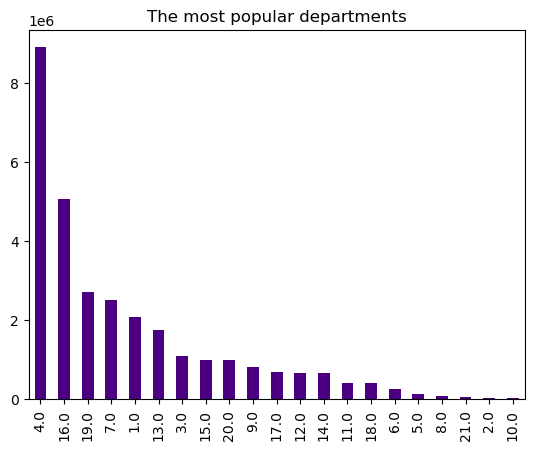

In [9]:
# illustration of order frequency by departments, this is for excel report
data['department_id'].value_counts(dropna=False).plot(kind='bar',  title = 'The most popular departments', color = 'Indigo')

## Step 2- Security implications
Customers first name and last name can be considered as sensative information. Due to memory issues I went back to the previous task and droped the columns (#data.drop(columns = {'first_name', 'last_name'}, inplace = True)) to maintain PII and then imported here.

## Step 3- Regions
## 3.1 Creating 'region' column

In [10]:
# check the state column
data['state'].value_counts(dropna=False)

Pennsylvania            626003
California              619377
Rhode Island            616005
Georgia                 615535
New Mexico              613252
Arizona                 613146
North Carolina          611018
Oklahoma                610954
Alaska                  607402
Minnesota               606952
Massachusetts           606002
Wyoming                 603254
Virginia                600998
Missouri                600027
Texas                   599536
Colorado                599168
Maine                   597710
North Dakota            597399
Alabama                 596749
Delaware                596476
Louisiana               596377
Kansas                  596360
South Carolina          596268
Nevada                  595274
Arkansas                595096
Oregon                  595079
New York                594878
Montana                 594458
Washington              593357
South Dakota            592697
Hawaii                  592166
Illinois                592080
Kentucky

Create new variable  'region'

In [11]:
data.loc[data['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island',
'Connecticut','New York','Pennsylvania', 'New Jersey']), 'region'] = 'Norteast'

In [12]:
data.loc[data['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio',
'North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']), 'region'] = 'Midwest'

In [13]:
data.loc[data['state'].isin(['Delaware','Maryland', 'District of Columbia','Virginia','West Virginia',
'North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama',
'Oklahoma','Texas','Arkansas','Louisiana']), 'region'] = 'South'

In [14]:
data.loc[data['state'].isin(['Idaho', 'Montana','Wyoming',
'Nevada','Utah','Colorado','Arizona','New Mexico','Alaska',
'Washington', 'Oregon','California','Hawaii']), 'region'] = 'West'

In [15]:
# check 'state_loc' column
data['region'].value_counts(dropna =False)

South       10099817
West         7765088
Midwest      7107586
Norteast     5356272
Name: region, dtype: int64

## 3.2 Determining the differencies in spending habits between different regions.
## Spending_flag variable defines user_id as high/low based on average price of products purchased (</> $10)

In [16]:
data['spending_flag'].value_counts(dropna=False)

Low spender     29730505
High Spender      598258
Name: spending_flag, dtype: int64

In [17]:
#create crosstab with data for plotting
crosstab_spending_region = pd.crosstab(data['region'], data['spending_flag'], dropna = False)

In [18]:
crosstab_spending_region

spending_flag,High Spender,Low spender
region,,
Midwest,148321,6959265
Norteast,102905,5253367
South,197110,9902707
West,149922,7615166


## With illustration it will be easier to see the differences between the rigions.

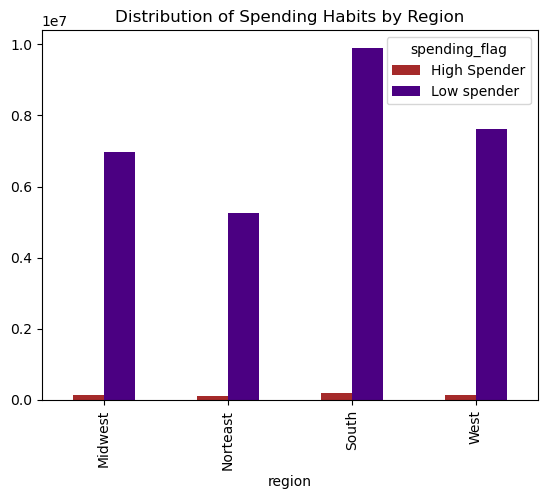

In [19]:
#ilustrate bar chart
bar_crosstab_spending= crosstab_spending_region.plot.bar(color = ['brown', 'indigo'], title= 'Distribution of Spending Habits by Region')

### From the above chart we can see that the highest number of spenders (high and low) are from South region, which follows by West, Midwest and Northeast regions.

In [20]:
#exporting bar chart to the visualization folder
bar_crosstab_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'bar_region_spending.png' ))

## Step 4
## Creating Exclusive Flag
To implement this task we used max_order column created on previous task, which is the maximum number of products ordered by users

In [21]:
data.loc[data['max_order'] < 5, 'exclusive_flag'] = 'Low activity customers'

In [22]:
data.loc[data['max_order'] > 5, 'exclusive_flag'] = 'Normal activity customers'

In [23]:
data['exclusive_flag'].value_counts(dropna=False)

Normal activity customers    28668554
Low activity customers        1025482
NaN                            634727
Name: exclusive_flag, dtype: int64

In [24]:
#create subset for high active customers 
#data_high_active_customers = data[data['exclusive_flag']=='Normal activity customers']

# This is not implemented as I experienced memory issues and I couldn't complete this task.

In [25]:
#data_high_active_customers.to_pickle(os.path.join (path, '02_Data', 'Prepared Data', 'df_high_value_customers.pkl'))


In [26]:
#data_high_value_customers.shape

## Step 5

### 5.1 Age profile. We will do it by classifying the 'age' column for further analysis

In [27]:
data['age'].value_counts(dropna=False)

49    498254
48    497289
79    497090
31    495755
64    494867
       ...  
60    452803
36    452784
66    444943
41    443151
25    441088
Name: age, Length: 64, dtype: int64

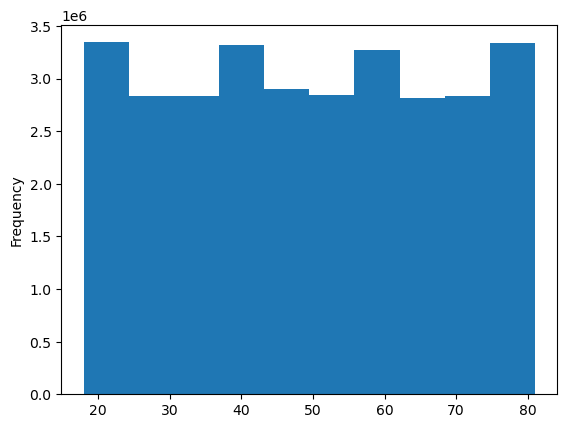

In [28]:
# With visualisation we will understand the distribution of age column.
# Creating histogram
data_age_hist = data['age'].plot.hist(bins=10)

In [29]:
# Creating 3 categories: young, middle_aged, senior
data.loc[data['age'] <= 35, 'age_flag'] = 'young'
data.loc[(data['age'] > 35) & (data['age'] < 65), 'age_flag'] = 'middle_aged'
data.loc[data['age'] >= 65, 'age_flag'] = 'senior'

In [30]:
data['age_flag'].value_counts(dropna = False)

middle_aged    13743703
young           8560115
senior          8024945
Name: age_flag, dtype: int64

### 5.2 Income profile. We will creat 4 groups: low_income, lower_middle, upper_middle and high_income groups

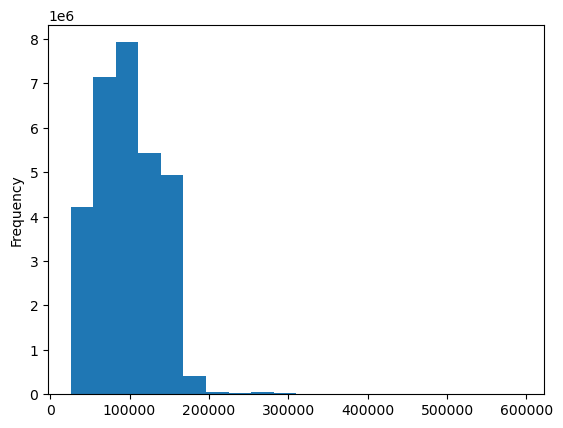

In [31]:
# create hist to see how income is distributed.
data_income_hist = data['income'].plot.hist(bins=20)

Looking at above chart, it makes sense to classify income group between 4 categories: low incme, lower_middle, upper_middle and
high income.

In [32]:
# create income_flag 
data.loc[data['income'] < 30000, 'income_flag'] = 'Low_income'
data.loc[(data['income'] >= 30000) & (data['income'] < 70000), 'income_flag'] = 'lower_middle'
data.loc[(data['income'] >= 70000) & (data['income'] < 180000), 'income_flag'] = 'upper_middle'
data.loc[data['income'] >= 180000, 'income_flag'] = 'high_income'

In [33]:
#count for frequency the four income groups, to see how they are distributed. 
data['income_flag'].value_counts(dropna= False)

upper_middle    21657390
lower_middle     8198256
high_income       281706
Low_income        191411
Name: income_flag, dtype: int64

### 5.3 Gender profile. For marketing purposes it would be interesting to know the distribution of gender of its users. You can see that it is almost the same.

In [34]:
#count for frequency of male and female
data['Gender'].value_counts(dropna= False)

Male      15269236
Female    15059527
Name: Gender, dtype: int64

### 5.4 Number_of_dependents profile. Criteria that can lead to the single adult or young parents

In [35]:
# count the frequency for the elements in family_status column
data['family_status'].value_counts(dropna= False)

married                             21297377
single                               4985022
divorced/widowed                     2594326
living with parents and siblings     1452038
Name: family_status, dtype: int64

In [36]:
data['number_of_dependents'].value_counts(dropna= False)

3    7615541
0    7579348
2    7572080
1    7561794
Name: number_of_dependents, dtype: int64

In [37]:
#create a crosstab between family status and number_of_dependents
crosstab_family_dependents = pd.crosstab(data['family_status'], data['number_of_dependents'], dropna = False)

In [38]:
# ilustrate crosstab
crosstab_family_dependents

number_of_dependents,0,1,2,3
family_status,,,,
divorced/widowed,2594326,0,0,0
living with parents and siblings,0,497309,475237,479492
married,0,7064485,7096843,7136049
single,4985022,0,0,0


The above crosstab_family_dependents illustrates that single and divorced/widowed groups have no dependents. For further analysis we will create family_dependents_flag to analyse how this variable is distributed in different regions.

In [39]:
# creat family_dependents_flag
data.loc[(data['family_status'].isin(['divorced/widowed', 'single'])) , 'family_dependents_flag'] = 'single_no_dependents'
data.loc[(data['family_status'].isin(['married', 'living with parents and siblings'])) & (data['number_of_dependents'] ==0), 'family_dependents_flag'] = 'non_single_no_dependents'
data.loc[(data['family_status'].isin(['married', 'living with parents and siblings'])) & (data['number_of_dependents'] ==1), 'family_dependents_flag'] = 'non_single_1_dependents'
data.loc[(data['family_status'].isin(['married', 'living with parents and siblings'])) & (data['number_of_dependents'] ==2), 'family_dependents_flag'] = 'non_single_2_dependents'
data.loc[(data['family_status'].isin(['married', 'living with parents and siblings'])) & (data['number_of_dependents'] ==3), 'family_dependents_flag'] = 'non_single_3_dependents'

In [40]:
data['family_dependents_flag'].value_counts(dropna= False)

non_single_3_dependents    7615541
single_no_dependents       7579348
non_single_2_dependents    7572080
non_single_1_dependents    7561794
Name: family_dependents_flag, dtype: int64

### 5.5 Young parents profile. 
### With the use of family_dependents_flag and age_flag we can identify the customers who belong to the the young parents category.

In [41]:
# Creat Parents_flag
data.loc[(data['family_dependents_flag'].isin(['non_single_3_dependents', 'non_single_2_dependents', 'non_single_1_dependents'])) & (data['age_flag'] =='young'), 'parents_flag'] = 'young parents'
data.loc[(data['family_dependents_flag'].isin(['non_single_3_dependents', 'non_single_2_dependents', 'non_single_1_dependents'])) & (data['age_flag'].isin(['middle_aged', 'senior'])), 'parents_flag'] = 'non-young parents'
data.loc[data['family_dependents_flag']=='single_no_dependents', 'parents_flag'] = 'single'

In [42]:
# count the frequency of young parents and others of parents_flag variable.
data['parents_flag'].value_counts(dropna= False)

non-young parents    16319090
single                7579348
young parents         6430325
Name: parents_flag, dtype: int64

### 5.6 Organic goods profile for Instacart customers


In [43]:
# count the frequency of products to see the what kind of products the Instacart has.
data['product_name'].value_counts(dropna = False)

Banana                                                      443031
Bag of Organic Bananas                                      360292
Organic Strawberries                                        248219
Organic Baby Spinach                                        226973
Organic Hass Avocado                                        202478
                                                             ...  
Thick 'n Chunky Salsa Mild                                       1
Training  Fluoride Free Toothpaste Apple & Banana Flavor         1
Flavor Snacks                                                    1
Ginger Lemon Cashew Oat-Based Snack Bars                         1
Indian Wells Merlot                                              1
Name: product_name, Length: 49630, dtype: int64

## Identifing customers with organic life style 

Organic products are among the popular, It makes sense to identify customers who prefer organic life style. This can be a new segment for marketing purposes

In [44]:
# The first step is to create 'organic_product' column that should distinguish organic products. 
organic_product =data['product_name'].str.contains('Organic')

In [45]:
# create new column 'organic_product' in our data frame.
data['organic_product']= organic_product

In [46]:
# count the frequency of organic product
data['organic_product'].value_counts(dropna = False)

False    20676328
True      9652435
Name: organic_product, dtype: int64

In [47]:
# group users who prefer organic products
data.groupby('user_id').agg({'organic_product':['sum']})

,organic_product
,sum
user_id,
1.0,14
2.0,45
3.0,27
4.0,2
5.0,11
...,...
206205.0,7
206206.0,86


In [48]:
# creat a coulumn that counts the number of organic products bought by each user_id -'organic_products_count' column
data['organic_counts'] = data.groupby('user_id').agg({'organic_product':['sum']})

In [49]:
data['organic_counts'].value_counts(dropna = False)

NaN       30122555
0.0          20108
1.0          11666
2.0           9855
3.0           8188
            ...   
619.0            1
1056.0           1
911.0            1
789.0            1
1036.0           1
Name: organic_counts, Length: 900, dtype: int64

In [50]:
# identify customers who prefer organic products (the principal is: if a customer buy even one type of organic products,
#this customer will be included in a new created variable: 'life_style'. )
data.loc[data['organic_counts']>10, 'life_style'] ='organic'
data.loc[data['organic_counts'] <10, 'life_style'] ='non_organic'

In [51]:
# count the freqency of the elements containing in the life_style variable. 
data['life_style'].value_counts(normalize= True)

organic        0.582386
non_organic    0.417614
Name: life_style, dtype: float64

In [52]:
#create crosstab to illustrate how organic preferences distributed among different social groups 
crosstab_organic_lifestyle = pd.crosstab(data['life_style'], data['income_flag'], dropna = False)
crosstab_organic_lifestyle

income_flag,Low_income,high_income,lower_middle,upper_middle
life_style,,,,
non_organic,1108,951,37796,44508
organic,1450,1385,52518,62296


# Step 6  Visualisation of Profiles

## 6.1 Instacart's customers distribution by Age

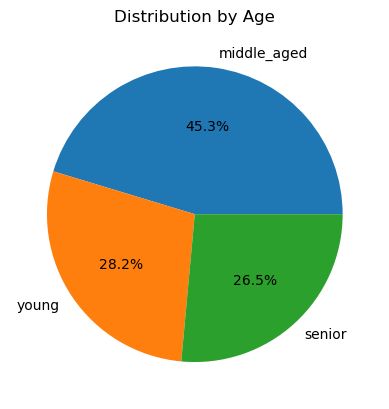

In [53]:
# Visualisation for age_flag
age_flag_pie =data['age_flag'].value_counts(dropna = False).plot(kind= 'pie', title = 'Distribution by Age', label = '', autopct ='%.1f%%')

In [54]:
# export the age_flag_pie chart
age_flag_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_flag_pie.png'))

## 6.2 Instacart's customers distribution by Income

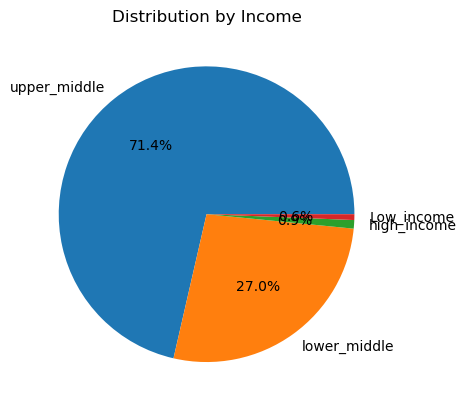

In [55]:
income_flag_pie =data['income_flag'].value_counts(dropna = False).plot(kind= 'pie', title = 'Distribution by Income', label = '', autopct ='%.1f%%')

In [56]:
# export the income_flag_pie chart
income_flag_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_flag_pie.png'))

## 6.3 Instacart's customers distribution by gender

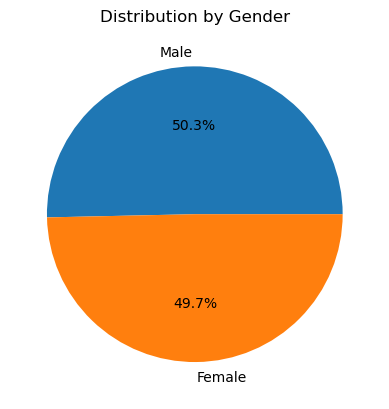

In [57]:
gender_pie =data['Gender'].value_counts(dropna= False).plot(kind= 'pie', title = 'Distribution by Gender', label = '', autopct ='%.1f%%')

In [58]:
# export the gender_pie chart
gender_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gender_pie.png'))

## 6.4 Instacart's customers distribution by number of dependents

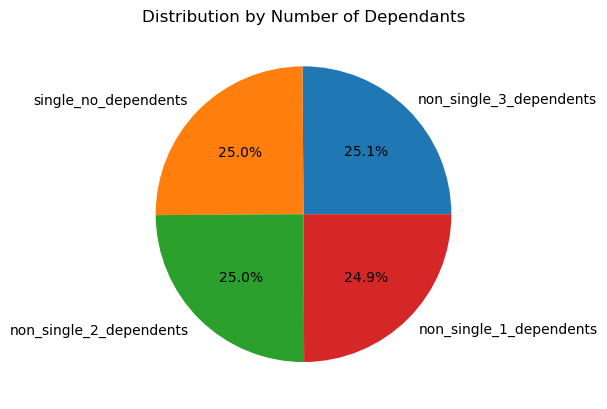

In [59]:
family_dependents_pie=data['family_dependents_flag'].value_counts(dropna= False).plot(kind= 'pie', title = 'Distribution by Number of Dependants', label = '', autopct ='%.1f%%')


In [60]:
# export the family_dependents_pie chart
family_dependents_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_pie.png'))

## 6.5 Instacart's customers distribution by age of parents

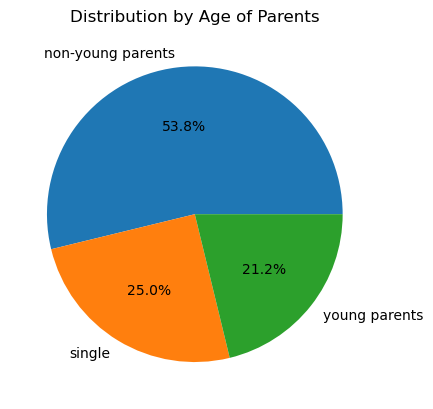

In [61]:
parents_pie=data['parents_flag'].value_counts(dropna= False).plot(kind= 'pie', title = 'Distribution by Age of Parents', label = '', autopct ='%.1f%%')

In [62]:
# export the family_dependents_pie chart
parents_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parents_pie.png'))

## 6.6 Instacart's customers distribution by Life Style

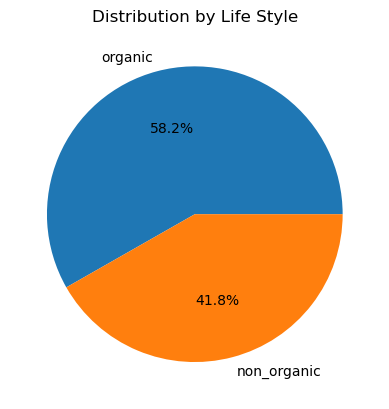

In [63]:
life_style_pie=data['life_style'].value_counts(normalize=True).plot(kind= 'pie', title = 'Distribution by Life Style', label = '', autopct ='%.1f%%')

In [64]:
# export the life_style_pie chart
life_style_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'life_style_pie.png'))

# Step 7. Aggregation on Instacart Customer-Profile for Usage Frequency and Expenditures

In [65]:
data.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'busiest_day', 'price_range_loc', 'Busiest days',
       'Slowest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_order', 'Frequency_flag',
       'Gender', 'state', 'age', 'date_of_joined', 'number_of_dependents',
       'family_status', 'income', 'region', 'exclusive_flag', 'age_flag',
       'income_flag', 'family_dependents_flag', 'parents_flag',
       'organic_product', 'organic_counts', 'life_style'],
      dtype='object')

We will use 'days_since_prior_order' and 'prices' columns for aggregation purposes to build statistics regarding frequency and expenditures.

## 7.1 Aggregation by Age

In [66]:
# create age_profile statistics
data.groupby('age_flag').agg({'days_since_prior_order':['max', 'mean', 'min'],  'order_number':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 order_number             \
                               max       mean  min          max       mean   
age_flag                                                                     
middle_aged                   30.0  11.105992  0.0         99.0  18.297112   
senior                        30.0  11.078641  0.0         99.0  18.201836   
young                         30.0  11.124858  0.0         99.0  18.209926   

                 prices                 
             min    max      mean  min  
age_flag                                
middle_aged  2.0   25.0  7.791527  1.0  
senior       2.0   25.0  7.797161  1.0  
young        2.0   25.0  7.785970  1.0

## 7.2 Aggregation by Income

In [67]:
# create income_profile statistics
data.groupby('income_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'order_number':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 order_number             \
                                max       mean  min          max       mean   
income_flag                                                                   
Low_income                     30.0  11.970702  0.0         99.0  16.307746   
high_income                    30.0  10.241901  0.0         99.0  20.541614   
lower_middle                   30.0  11.266238  0.0         99.0  17.907369   
upper_middle                   30.0  11.046250  0.0         99.0  18.363270   

                  prices                 
              min    max      mean  min  
income_flag                              
Low_income    2.0   25.0  6.523854  1.0  
high_income   2.0   25.0  7.790595  1.0  
lower_middle  2.0   25.0  7.372562  1.0  
upper_middle  2.0   25.0  7.961246  1.0

## 7.3 Aggregation by Gender

In [68]:
# create gender_profile statistics
data.groupby('Gender').agg({'days_since_prior_order':['max', 'mean', 'min'],'order_number':['max', 'mean', 'min'],  'prices':['max', 'mean', 'min']})

days_since_prior_order                 order_number                  \
                          max       mean  min          max       mean  min   
Gender                                                                       
Female                   30.0  11.085143  0.0         99.0  18.322756  2.0   
Male                     30.0  11.122757  0.0         99.0  18.172870  2.0   

       prices                 
          max      mean  min  
Gender                        
Female   25.0  7.789481  1.0  
Male     25.0  7.793391  1.0

## 7.4 Aggregation by Number of Dependants

In [69]:
# create dependants_profile statistics
data.groupby('family_dependents_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'order_number':['max', 'mean', 'min'],'prices':['max', 'mean', 'min']})


days_since_prior_order                 order_number  \
                                           max       mean  min          max   
family_dependents_flag                                                        
non_single_1_dependents                   30.0  11.100028  0.0         99.0   
non_single_2_dependents                   30.0  11.125756  0.0         99.0   
non_single_3_dependents                   30.0  11.109714  0.0         99.0   
single_no_dependents                      30.0  11.080806  0.0         99.0   

                                        prices                 
                              mean  min    max      mean  min  
family_dependents_flag                                         
non_single_1_dependents  18.203438  2.0   25.0  7.795453  1.0  
non_single_2_dependents  18.164297  2.0   25.0  7.785011  1.0  
non_single_3_dependents  18.244737  2.0   25.0  7.794100  1.0  
single_no_dependents     18.376537  2.0   25.0  7.791225  1.0

## 7.5 Aggregation by Parents Age

In [70]:
# create parents age statistics
data.groupby('parents_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'order_number':['max', 'mean', 'min'],'prices':['max', 'mean', 'min']})


days_since_prior_order                 order_number  \
                                     max       mean  min          max   
parents_flag                                                            
non-young parents                   30.0  11.113630  0.0         99.0   
single                              30.0  11.080806  0.0         99.0   
young parents                       30.0  11.107277  0.0         99.0   

                                  prices                 
                        mean  min    max      mean  min  
parents_flag                                             
non-young parents  18.196678  2.0   25.0  7.793282  1.0  
single             18.376537  2.0   25.0  7.791225  1.0  
young parents      18.223415  2.0   25.0  7.787063  1.0

## 7.6 Aggregation by Life Style

In [71]:
# create life style statistics
data.groupby('life_style').agg({'days_since_prior_order':['max', 'mean', 'min'], 'order_number':['max', 'mean', 'min'],'prices':['max', 'mean', 'min']})


days_since_prior_order                order_number             \
                               max      mean  min          max       mean   
life_style                                                                  
non_organic                   30.0  9.815274  0.0         99.0  21.798348   
organic                       30.0  9.860840  0.0         99.0  21.805413   

                 prices                 
             min    max      mean  min  
life_style                              
non_organic  2.0   25.0  7.423598  1.0  
organic      2.0   25.0  7.429442  1.0

# Step 8. Comparing Customer-Profile by Regions and Departments

## 8.1 Comparing Age profiles by Regions and Departments

In [72]:
#create crosstab to illustrate how age groups are destributed by regions
crosstab_age_region = pd.crosstab(data['age_flag'], data['region'], normalize = True)
crosstab_age_region

region,Midwest,Norteast,South,West
age_flag,,,,
middle_aged,0.107793,0.078470,0.150216,0.116678
senior,0.061374,0.047997,0.087496,0.067731
young,0.065184,0.050140,0.095300,0.071621


In [73]:
#create crosstab to illustrate how age groups are destributed by departments
crosstab_age_department = pd.crosstab(data['department_id'], data['age_flag'], normalize = True)
crosstab_age_department

age_flag,middle_aged,senior,young
department_id,,,
1.0,0.031007,0.018204,0.019256
2.0,0.000507,0.000291,0.000321
3.0,0.016395,0.009542,0.010239
4.0,0.132944,0.077777,0.082562
5.0,0.002112,0.001179,0.001358
6.0,0.003738,0.002168,0.002347
7.0,0.037806,0.022104,0.023200
8.0,0.001339,0.000814,0.000850
9.0,0.012027,0.007018,0.007519


## 8.2 Comparing Income profiles by Regions and Departments

In [74]:
#create crosstab to illustrate how income groups are destributed by regions
crosstab_income_region = pd.crosstab(data['income_flag'], data['region'], normalize = True)
crosstab_income_region

region,Midwest,Norteast,South,West
income_flag,,,,
Low_income,0.001734,0.001076,0.002114,0.001388
high_income,0.002351,0.001453,0.003101,0.002384
lower_middle,0.062391,0.047170,0.090442,0.070310
upper_middle,0.167876,0.126908,0.237355,0.181949


In [75]:
#create crosstab to illustrate how income groups are destributed by departments
crosstab_income_department = pd.crosstab(data['department_id'], data['income_flag'], normalize = True)
crosstab_income_department

income_flag,Low_income,high_income,lower_middle,upper_middle
department_id,,,,
1.0,0.000415,7.322422e-04,0.017912,0.049408
2.0,0.000009,1.671680e-05,0.000300,0.000793
3.0,0.000197,4.623004e-04,0.009313,0.026204
4.0,0.001497,1.811119e-03,0.075061,0.214914
5.0,0.000041,2.264517e-04,0.001247,0.003134
6.0,0.000045,7.415403e-05,0.002047,0.006086
7.0,0.000757,8.817043e-04,0.025349,0.056122
8.0,0.000015,6.670236e-05,0.000762,0.002160
9.0,0.000130,2.533569e-04,0.006403,0.019777


## 8.3 Comparing Gender profiles by Regions and Departments

In [76]:
#create crosstab to illustrate how gender groups are destributed by regions
crosstab_gender_region = pd.crosstab(data['Gender'], data['region'], normalize = True)
crosstab_gender_region

region,Midwest,Norteast,South,West
Gender,,,,
Female,0.117469,0.085230,0.165873,0.127971
Male,0.116882,0.091377,0.167139,0.128059


In [77]:
#create crosstab to illustrate how gender groups are destributed by departments
crosstab_gender_department = pd.crosstab(data['department_id'], data['Gender'], normalize = True)
crosstab_gender_department

Gender,Female,Male
department_id,,
1.0,0.033963,0.034504
2.0,0.000557,0.000561
3.0,0.018055,0.018120
4.0,0.145396,0.147887
5.0,0.002407,0.002242
6.0,0.004079,0.004174
7.0,0.041354,0.041756
8.0,0.001463,0.001540
9.0,0.013187,0.013377


## 8.4 Comparing Number of Dependants profiles by Regions and Departments

In [78]:
#create crosstab to illustrate how number of dependants profile is destributed by regions
crosstab_dependants_region = pd.crosstab(data['family_dependents_flag'], data['region'], normalize = True)
crosstab_dependants_region

region,Midwest,Norteast,South,West
family_dependents_flag,,,,
non_single_1_dependents,0.059443,0.044526,0.082043,0.063316
non_single_2_dependents,0.058325,0.043736,0.084065,0.063542
non_single_3_dependents,0.057767,0.044619,0.083547,0.065165
single_no_dependents,0.058817,0.043726,0.083356,0.064007


In [79]:
#create crosstab to illustrate how number of dependants is destributed by departments
crosstab_dependants_department = pd.crosstab(data['department_id'], data['family_dependents_flag'], normalize = True)
crosstab_dependants_department

family_dependents_flag,non_single_1_dependents,non_single_2_dependents,non_single_3_dependents,single_no_dependents
department_id,,,,
1.0,0.016993,0.017218,0.017188,0.017069
2.0,0.000283,0.000280,0.000273,0.000283
3.0,0.009043,0.009011,0.009042,0.009080
4.0,0.072980,0.072900,0.073904,0.073499
5.0,0.001148,0.001109,0.001201,0.001190
6.0,0.002087,0.002041,0.002047,0.002077
7.0,0.020650,0.020887,0.020713,0.020861
8.0,0.000769,0.000730,0.000748,0.000757
9.0,0.006621,0.006606,0.006737,0.006599


## 8.5 Comparing Parents Profiles by Regions and Departments

In [80]:
#create crosstab to illustrate how young parents group is destributed by regions
crosstab_parents_region = pd.crosstab(data['parents_flag'], data['region'], normalize = True)
crosstab_parents_region

region,Midwest,Norteast,South,West
parents_flag,,,,
non-young parents,0.126206,0.095560,0.178330,0.137977
single,0.058817,0.043726,0.083356,0.064007
young parents,0.049328,0.037321,0.071325,0.054047


In [81]:
#create crosstab to illustrate how young parents group is destributed by departments
crosstab_parents_department = pd.crosstab(data['department_id'], data['parents_flag'], normalize = True)
crosstab_parents_department

parents_flag,non-young parents,single,young parents
department_id,,,
1.0,0.036854,0.017069,0.014544
2.0,0.000596,0.000283,0.000240
3.0,0.019431,0.009080,0.007664
4.0,0.157808,0.073499,0.061976
5.0,0.002428,0.001190,0.001030
6.0,0.004422,0.002077,0.001754
7.0,0.044912,0.020861,0.017338
8.0,0.001613,0.000757,0.000634
9.0,0.014316,0.006599,0.005648


## 8.6 Comparing Life Style Profiles by Regions and Departments

In [82]:
#create crosstab to illustrate how life style is destributed by regions
crosstab_lifestyle_region = pd.crosstab(data['life_style'], data['region'], normalize = True)
crosstab_lifestyle_region

region,Midwest,Norteast,South,West
life_style,,,,
non_organic,0.091539,0.064189,0.157055,0.104830
organic,0.128646,0.091262,0.217596,0.144882


In [83]:
#create crosstab to illustrate how organic preferences is destributed by departments
crosstab_lifestyle_department = pd.crosstab(data['department_id'], data['life_style'], normalize = True)
crosstab_lifestyle_department

life_style,non_organic,organic
department_id,,
1.0,0.025261,0.035399
2.0,0.000510,0.000718
3.0,0.015608,0.021806
4.0,0.084361,0.118211
5.0,0.006316,0.008688
6.0,0.002277,0.002881
7.0,0.068758,0.095786
8.0,0.002426,0.003529
9.0,0.008094,0.011054


# Step 9 -Producing Charts to Illustrate the Results

## 9.1 Illustration of the Destribution of Age by Regions and By Departments

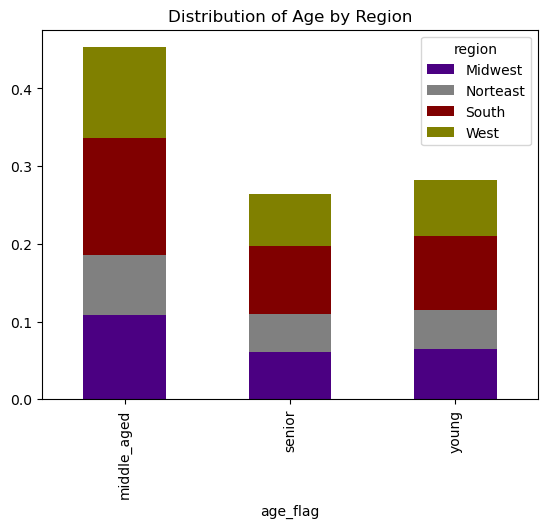

In [84]:
# Age profile by regions
region_age_bar =crosstab_age_region.plot(kind= 'bar', stacked= True, color = ['indigo', 'gray', 'maroon',  'olive'], title='Distribution of Age by Region')

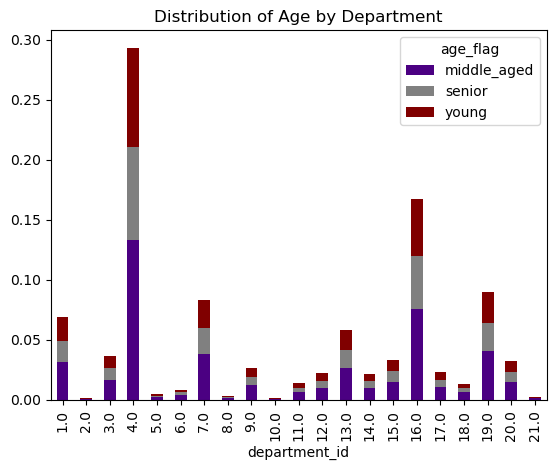

In [85]:
# Age profile by departments
department_age_bar =crosstab_age_department.plot(kind= 'bar', stacked= True, color = ['indigo', 'gray', 'maroon',  'olive'], title='Distribution of Age by Department')

### 1.Conclusion for Age profile: Middle aged group ( 35-65 years old) represents the largest segment divided by age, it follows by younger group(up to the age of 35) and the smallest group is senior group. The majority of Instacart customers are located in South region. For middle aged customers the top popular departments are 4-produce, 16-dairy eggs and 19-snacks.

In [86]:
# export the region_age_bar chart
region_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_age_bar.png'))

In [87]:
# export the department_age_bar chart
department_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_age_bar.png'))

## 9.2 Illustration of the Income Profile by Regions and by Departments

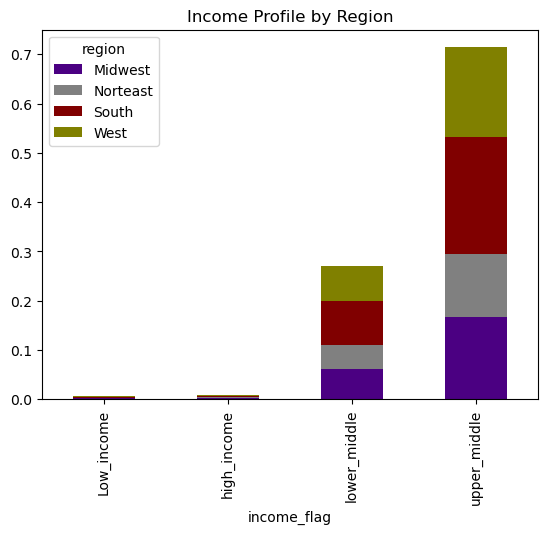

In [88]:
#Income profile by region
region_income_bar =crosstab_income_region.plot(kind= 'bar', stacked = True, color = ['indigo', 'gray', 'maroon',  'olive'], title='Income Profile by Region' )

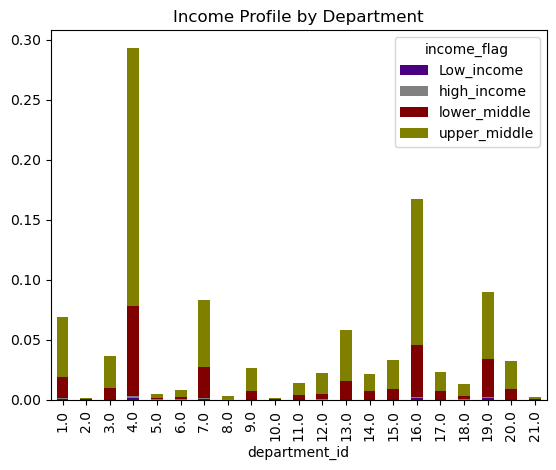

In [89]:
#Income profile by department
department_income_bar =crosstab_income_department.plot(kind= 'bar', stacked = True, color = ['indigo', 'gray', 'maroon',  'olive'], title='Income Profile by Department' )

### Conclusion:  the largest segment divided by income represents upper-middle segment, which follows by lower middle level. The largest portion comes from the South, as the majority of customers are located in that region. It would be interesting to investigate further- whether the upper -middle group is the largest segment on the country level? If it is not case, then we can conclude that Instacart is more popular among upper-middle class. We also have to take into account the national statistics- how social grous are estimated on the national basis? Departments segmentation by social groupd follow the same pattern as in case of Age variable. The three most popular departments are No4, No 16 and No 19.

In [90]:
# export the region_income_bar chart
region_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_income_bar.png'))

In [91]:
# export the department_income_bar chart
department_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_income_bar.png'))

## 9.3 Illustration of the Gender Profile by Regions

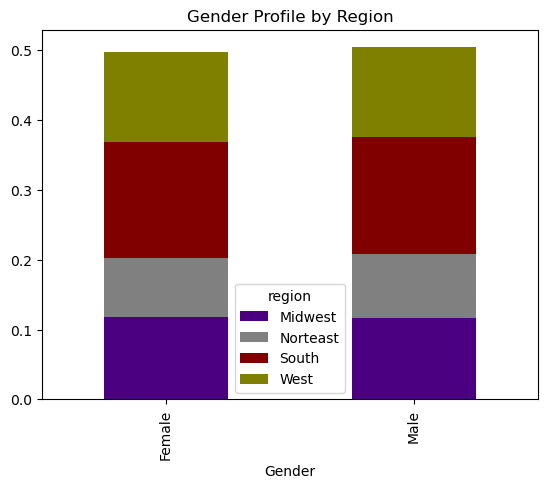

In [92]:
# gender profile by region
region_gender_bar =crosstab_gender_region.plot(kind= 'bar', stacked = True, color = ['indigo', 'gray', 'maroon',  'olive'], title='Gender Profile by Region')

### Conclusion: There is no significant differences of Instacart customers segmented by gender: 50.30 % is male and 49.7% is female. Again we can compare it on the country level to see how gender is segmented to make any conclusion regarding the popularity of Instacart among male and female. 

In [93]:
# export the region_gender_bar chart
region_gender_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_gender_bar.png'))

## 9.4 Illustration of the Dependants Profile by Regions

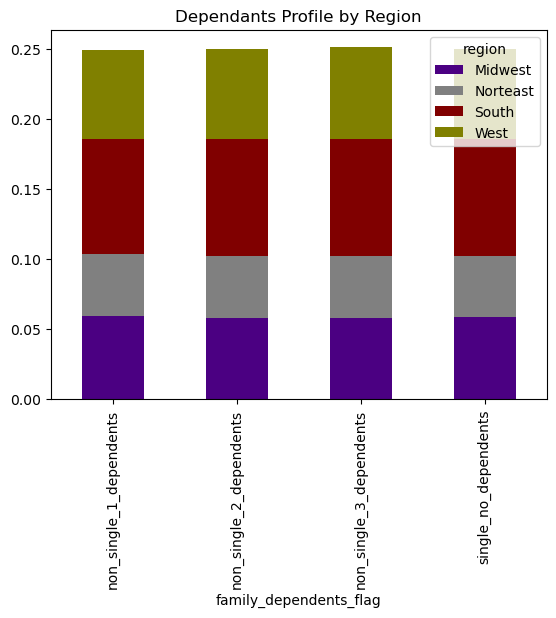

In [94]:
#dependants profile by region
region_dependants_bar =crosstab_dependants_region.plot(kind= 'bar',stacked = True, color = ['indigo', 'gray', 'maroon',  'olive'], title='Dependants Profile by Region')

### Conclusion: We can see that again the majority comes from the South, but this variable is equally distributed among the elements of this group- each group represents almost 25 % of dependants variable.

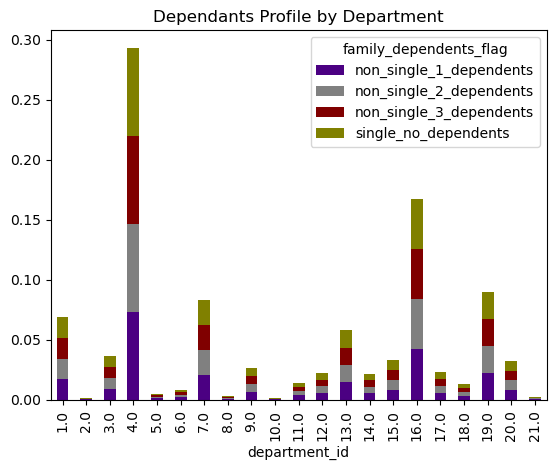

In [95]:
# dependants profile by departments
department_dependants_bar =crosstab_dependants_department.plot(kind= 'bar',stacked = True, color = ['indigo', 'gray', 'maroon',  'olive'], title='Dependants Profile by Department')

In [96]:
# export the region_dependants_bar chart
region_dependants_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_dependants_bar.png'))

In [97]:
# export the region_dependants_bar chart
department_dependants_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_dependants_bar.png'))

## 9.5 Illustration of the Parents Profile by Regions

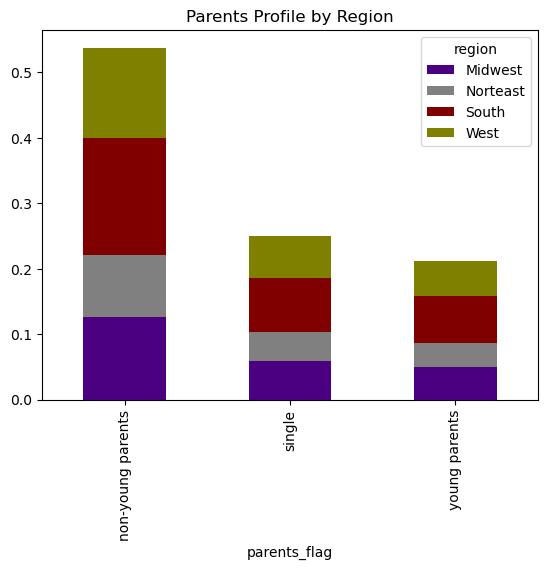

In [98]:
# Parents profile by region
region_parents_bar =crosstab_parents_region.plot(kind= 'bar',stacked = True, color = ['indigo', 'gray', 'maroon',  'olive'], title='Parents Profile by Region')

### Conclusion: Non-young parents are the largest group in parents variable. It follows by single group and the third group is young parents. We defined young parents as parents up to the age of 35 who have one and more depandants. it shouldn't be surprise as we have the same distribution in case of age profile.

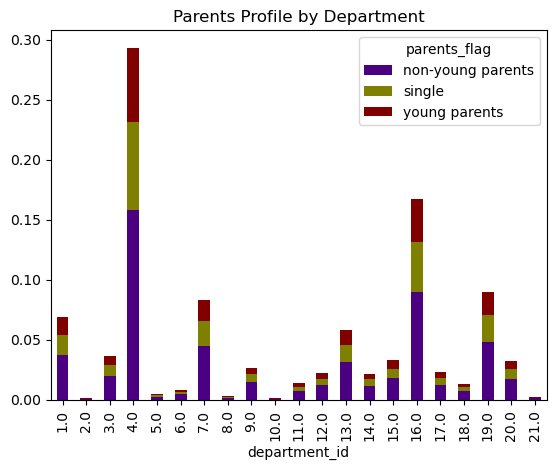

In [99]:
# Parents profile by departments
department_parents_bar =crosstab_parents_department.plot(kind= 'bar',stacked = True, color = ['indigo', 'olive', 'maroon'], title='Parents Profile by Department')

In [100]:
# export the region_parents_bar chart
region_parents_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_parents_bar.png'))

In [101]:
# export the department_parents_bar chart
department_parents_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_parents_bar.png'))

## 9.6 Illustration of the Life Style Profile by Regions and by Departments

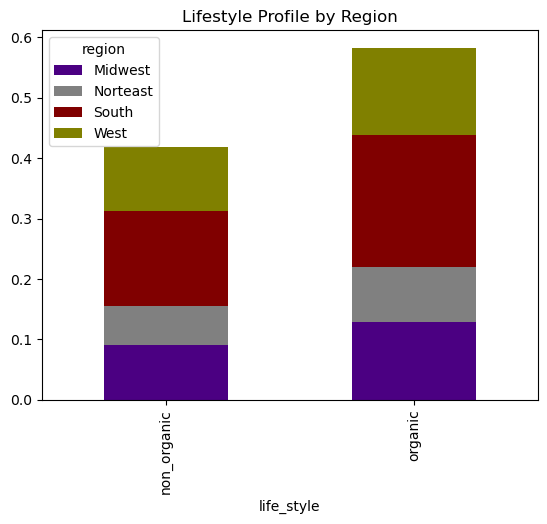

In [102]:
# Lifestyle by region
region_lifestyle_bar =crosstab_lifestyle_region.plot(kind= 'bar',stacked = True, color = ['indigo', 'gray', 'maroon',  'olive'], title='Lifestyle Profile by Region')

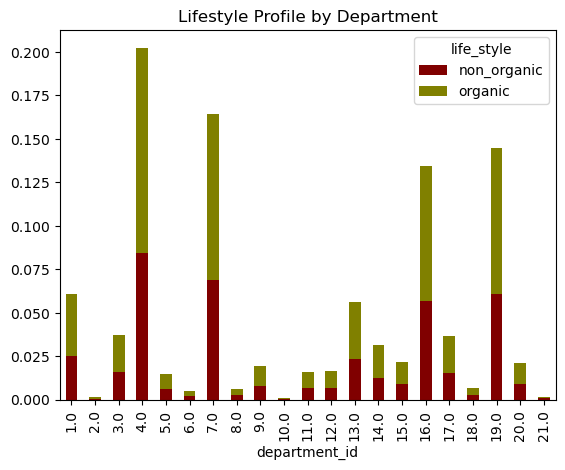

In [103]:
#lifestyle by departments
department_lifestyle_bar =crosstab_lifestyle_department.plot(kind= 'bar',stacked = True, color = ['maroon',  'olive'], title='Lifestyle Profile by Department')

### Conclusion: Organic life style varible has been defined based on  the criteria that any user that buy organc product is included in this group. The majority of customers (89.7 %) are inclined to buy organic product and only 10 % have never bought. In case of lifestyle distribution by department, it is a little bit different than in case of other variables. The top three- No4-produce, No7- beverages and No 19-snacks, and then it follows by No 16-dairy eggs.

In [104]:
# export the region_lifestyle_bar chart
region_lifestyle_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_lifestyle_bar.png'))

In [105]:
# export the departments_lifestyle_bar chart
department_lifestyle_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_lifestyle_bar.png'))

In [106]:
# illustrate the dapartments name
department_name

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [107]:
data.to_pickle(os.path.join(path,'02_Data', 'Prepared Data', 'data_instacart.pkl'  ))